Sara Sadat Younesi

IMPORT LIBRARY FROM TORCH

In [1]:
import torch
import torch.nn as nn
from PIL import Image
import numpy as np
import torch.optim as optim
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

Read image and size of image

In [2]:
image1 = Image.open('Q5_1.png')
image2 = Image.open('Q5_2.png')
image3 = Image.open('Q5_3.png')


Check type of image

In [3]:
print(type(image1))

<class 'PIL.PngImagePlugin.PngImageFile'>


In [4]:
transform = transforms.Compose([transforms.Resize((8, 8)), transforms.Grayscale(num_output_channels=1), transforms.ToTensor()])
tensor_image1 = transform(image1)
tensor_image2 = transform(image2)
tensor_image3 = transform(image3)

print(tensor_image1)
print(tensor_image2)
print(tensor_image3)

y = torch.tensor([0, 1, 2])

tensor([[[0.9098, 0.8980, 0.8980, 0.8980, 0.8980, 0.8980, 0.8980, 0.9020],
         [0.9059, 0.8980, 0.8980, 0.8980, 0.8863, 0.8353, 0.8353, 0.8902],
         [0.9059, 0.8863, 0.8431, 0.8784, 0.7843, 0.4627, 0.4667, 0.7725],
         [0.8471, 0.8196, 0.4667, 0.7098, 0.4510, 0.6980, 0.6980, 0.4000],
         [0.4275, 0.7569, 0.3569, 0.3882, 0.3569, 0.4078, 0.4078, 0.3529],
         [0.3451, 0.6941, 0.4000, 0.7529, 0.8157, 0.8157, 0.8157, 0.8196],
         [0.3529, 0.3961, 0.4157, 0.8314, 0.8980, 0.8980, 0.8980, 0.9020],
         [0.8314, 0.8196, 0.8275, 0.8980, 0.9059, 0.9059, 0.9059, 0.9098]]])
tensor([[[0.9059, 0.9059, 0.9059, 0.8980, 0.7804, 0.4706, 0.7098, 0.4314],
         [0.8980, 0.8980, 0.8980, 0.8431, 0.5176, 0.6706, 0.5059, 0.7765],
         [0.8275, 0.8863, 0.8941, 0.8784, 0.7294, 0.5020, 0.7804, 0.8980],
         [0.4000, 0.7608, 0.8196, 0.7647, 0.4549, 0.7686, 0.8863, 0.9098],
         [0.3529, 0.4078, 0.4157, 0.4078, 0.4157, 0.8275, 0.8980, 0.9098],
         [0.8235, 0.823

Define Base MLP Architecture

Define input layer with 64 neroun
Define hidden layer with 16 noren
Define output layer with 3 noren
Define Activation function
AND forward in network step by step

In [5]:
class main_l(nn.Module):
    def __init__(self):
        super(main_l, self).__init__()

        self.input = nn.Linear(64, 16)
        self.hidden = nn.Linear(16, 16)
        self.output = nn.Linear(16, 3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()


    def forward(self, x):
        x = self.input(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)

        return x

define model and loss CrossEntropyLoss function
Adam optimizer

In [6]:
model = main_l()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

train the model via epochs
and fix train data for training in one tensor


In [7]:
num_epochs = 100
epochs = []
epoch_losses = []

train_data = torch.stack([tensor_image1, tensor_image2, tensor_image1])
train_data = train_data.view(train_data.size(0), -1)
train_labels = torch.LongTensor([0, 1, 2])

for epoch in range(num_epochs):
    loss = loss_function(model(train_data), train_labels)
    optimizer.zero_grad()


    loss.backward()
    optimizer.step()

    o = epoch + 1
    epochs.append(o)
    epoch_losses.append(loss.item())

    print(f'Epoch {o}/{num_epochs}')
    print(f"Loss: {loss.item()}")

Epoch 1/100
Loss: 1.0965622663497925
Epoch 2/100
Loss: 1.087426781654358
Epoch 3/100
Loss: 1.0758947134017944
Epoch 4/100
Loss: 1.0606800317764282
Epoch 5/100
Loss: 1.0409187078475952
Epoch 6/100
Loss: 1.016611933708191
Epoch 7/100
Loss: 0.9865768551826477
Epoch 8/100
Loss: 0.9546770453453064
Epoch 9/100
Loss: 0.922368049621582
Epoch 10/100
Loss: 0.8923851847648621
Epoch 11/100
Loss: 0.8674263954162598
Epoch 12/100
Loss: 0.8499452471733093
Epoch 13/100
Loss: 0.8389735817909241
Epoch 14/100
Loss: 0.832313597202301
Epoch 15/100
Loss: 0.8284420967102051
Epoch 16/100
Loss: 0.8262064456939697
Epoch 17/100
Loss: 0.8245866298675537
Epoch 18/100
Loss: 0.8236510753631592
Epoch 19/100
Loss: 0.8232190012931824
Epoch 20/100
Loss: 0.8230650424957275
Epoch 21/100
Loss: 0.8227901458740234
Epoch 22/100
Loss: 0.8226218223571777
Epoch 23/100
Loss: 0.8226122856140137
Epoch 24/100
Loss: 0.8225570321083069
Epoch 25/100
Loss: 0.8225329518318176
Epoch 26/100
Loss: 0.8225577473640442
Epoch 27/100
Loss: 0.8225

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 61/100
Loss: 0.8224987983703613
Epoch 62/100
Loss: 0.8224970698356628
Epoch 63/100
Loss: 0.822497546672821
Epoch 64/100
Loss: 0.8224976658821106
Epoch 65/100
Loss: 0.8224965929985046
Epoch 66/100
Loss: 0.8224977850914001
Epoch 67/100
Loss: 0.8224965929985046
Epoch 68/100
Loss: 0.8224971890449524
Epoch 69/100
Loss: 0.8224968910217285
Epoch 70/100
Loss: 0.8224966526031494
Epoch 71/100
Loss: 0.8224970698356628
Epoch 72/100
Loss: 0.8224963545799255
Epoch 73/100
Loss: 0.8224968910217285
Epoch 74/100
Loss: 0.8224963545799255
Epoch 75/100
Loss: 0.8224965929985046
Epoch 76/100
Loss: 0.8224964737892151
Epoch 77/100
Loss: 0.8224963545799255
Epoch 78/100
Loss: 0.8224965929985046
Epoch 79/100
Loss: 0.8224961757659912
Epoch 80/100
Loss: 0.8224964737892151
Epoch 81/100
Loss: 0.8224961161613464
Epoch 82/100
Loss: 0.8224964141845703
Epoch 83/100
Loss: 0.8224961757659912
Epoch 84/100
Loss: 0.8224961757659912
Epoch 85/100
Loss: 0.8224961757659912
Epoch 86/100
Loss: 0.8224961757659912
Epoch 87/100


plot loss value with respect to each epoch

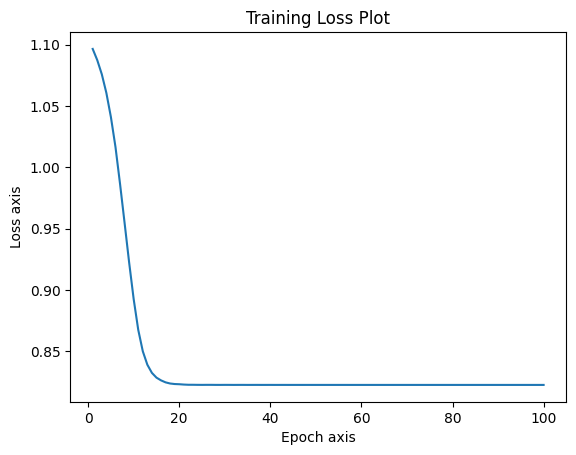

In [8]:
plt.plot(epochs, epoch_losses)
plt.title('Training Loss Plot')
plt.xlabel('Epoch axis')
plt.ylabel('Loss axis')
plt.show()